In [4]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [5]:
pip install opencv-python


     ---------------------------------------- 38.1/38.1 MB 6.7 MB/s eta 0:00:00


In [83]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [84]:
img = cv2.imread('./test images/1200.jpg')
img.shape

(1574, 1200, 3)

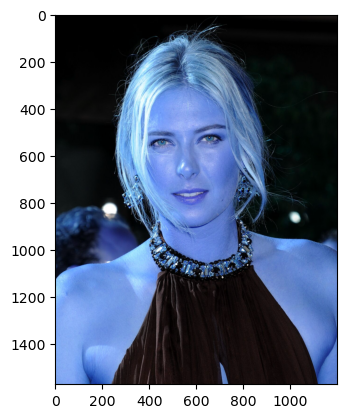

In [85]:
plt.imshow(img)

In [86]:
#to conver background to gray
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1574, 1200)

In [87]:
gray #is n dimensional array of n numbers

array([[  0,   0,   0, ...,  29,  29,  27],
       [  0,   0,   0, ...,  29,  28,  27],
       [  0,   0,   0, ...,  29,  28,  27],
       ...,
       [182, 182, 181, ..., 144, 143, 141],
       [182, 181, 181, ..., 145, 144, 144],
       [181, 181, 181, ..., 144, 144, 145]], dtype=uint8)

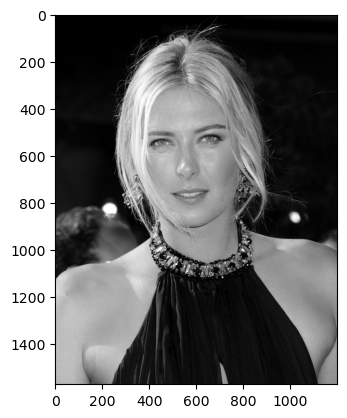

In [88]:
plt.imshow(gray,cmap = 'gray')

In [89]:
#haarcascade is used for idenifying the body parts by using the block by block check opencv documentation for more details
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[292, 326, 558, 558]])

In [90]:
(x,y,w,h) = faces[0]
x,y,w,h

(292, 326, 558, 558)

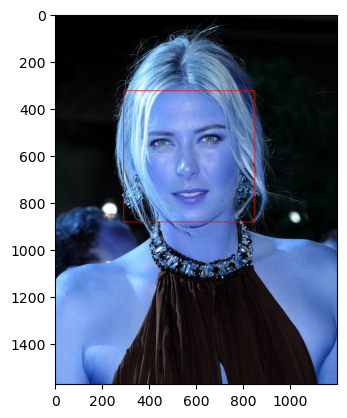

In [91]:
#we will draw a red square on the face of image
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

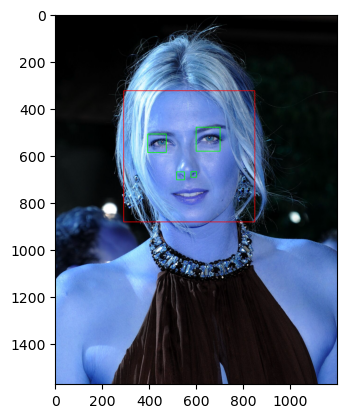

In [92]:
#now we will marks eyes on the face
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

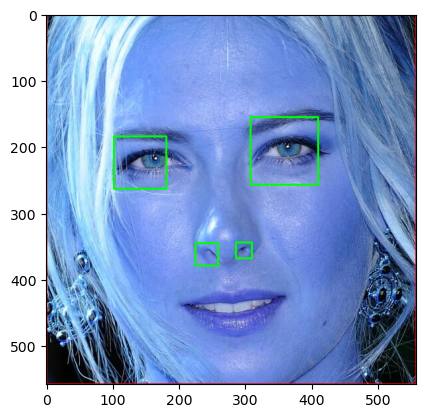

In [93]:
%matplotlib inline
plt.imshow(roi_color,cmap = 'gray')

In [104]:
#we will write a function to give cropped image
def get_cropped_img_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

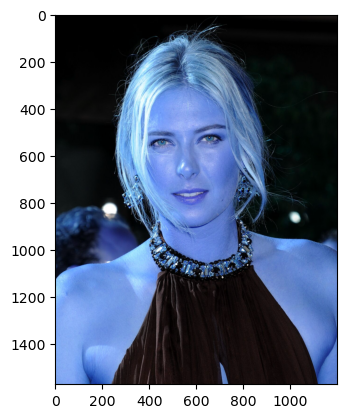

In [105]:
original_img = cv2.imread('./test images/1200.jpg')
plt.imshow(original_img)

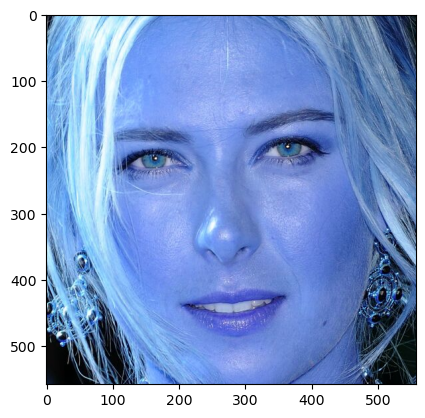

In [106]:
cropped_image = get_cropped_img_if_2_eyes('./test images/1200.jpg')
plt.imshow(cropped_image)

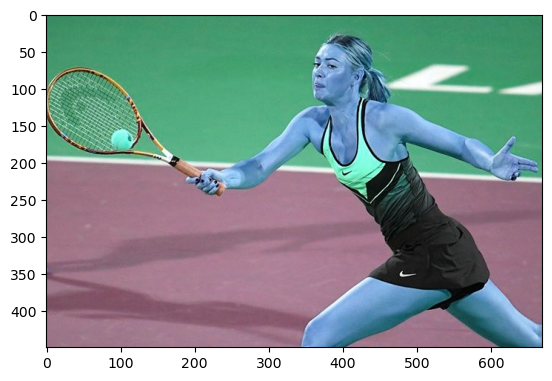

In [107]:
original_img = cv2.imread('./test images/08maria.jpg')
plt.imshow(original_img)

In [108]:
cropped_image2 = get_cropped_img_if_2_eyes('./test images/08maria.jpg')
cropped_image2

In [109]:
#now we will create folder for cropped images
path_to_data = './dataset/'
path_to_cr_data = "./dataset/cropped/"

In [110]:
#we will store the location of all subfolder in datset folder
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [111]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [112]:
#we will create cropped folder if not exist
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [113]:
#now will save crropped images in the cropped folder
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] #gets celebrity name
    
    celebrity_file_names_dict[celebrity_name] = [] #will create a dictionary of images for each celebrity
    
    for entry in os.scandir(img_dir): #loop trough eacch image of celebrity
        roi_color = get_cropped_img_if_2_eyes(entry.path) #gets a cropped image
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder) #it will a cropped folder for specific celebrity if not exists
                cropped_img_dirs.append(cropped_folder)
                print('Generating cropped imaged in folder ',cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + '.png' #will create a name of image
            cropped_file_path = cropped_folder + '/' + cropped_file_name #create path of image
            
            cv2.imwrite(cropped_file_path, roi_color) #will save croopped image in the folder
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) #it will add to dictionary for specific celebrity
            count += 1

Generating cropped imaged in folder  ./dataset/cropped/lionel_messi
Generating cropped imaged in folder  ./dataset/cropped/maria_sharapova
Generating cropped imaged in folder  ./dataset/cropped/roger_federer
Generating cropped imaged in folder  ./dataset/cropped/serena_williams
Generating cropped imaged in folder  ./dataset/cropped/virat_kohli


#### Feature engineering

In [114]:
#wavelet  transform is used extract the meaningfull features from the images like position of nose , eyes etc

In [126]:
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

In [124]:
import numpy as np
import pywt #python wavelet transform
import cv2

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    #datatype conversion
    #convert to greyscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    #computer coefficients
    coeffs= pywt.wavedec2(imArray,mode,level = level)
    
    #process coeffcients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

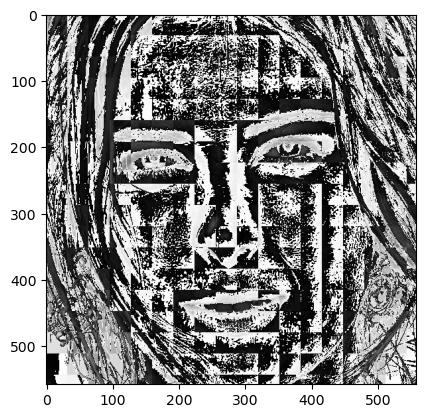

In [125]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap = 'gray')

In [128]:
#we will assign some random numebr to each celebrity which helps for our classification
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [140]:
#we will define a function that will place original cropped image and wavelet transform image vertical stack
x = [] #to create x and y dataset
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_file in training_files:
        img = cv2.imread(training_file)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [141]:
len(x)

163

In [142]:
len(x[0])

4096

In [143]:
x[0]

array([[100],
       [129],
       [140],
       ...,
       [238],
       [232],
       [230]], dtype=uint8)

In [144]:
#we will convert int to float
x = np.array(x).reshape(len(x),4096).astype(float)

In [145]:
x.shape

(163, 4096)

In [146]:
x[0]

array([100., 129., 140., ..., 238., 232., 230.])

### Data cleaning process is done now we will start trainning the model

In [147]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [148]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, random_state = 0)

In [153]:
#pipeline is created just to make scale data and train the model
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf',C = 10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.8048780487804879

In [154]:
len(x_test)

41

In [155]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.78      0.70      0.74        10
           2       0.60      0.75      0.67         8
           3       0.80      1.00      0.89         4
           4       0.92      0.92      0.92        12

    accuracy                           0.80        41
   macro avg       0.82      0.82      0.81        41
weighted avg       0.82      0.80      0.81        41



### lets use grid search cv to find the best fit model

In [156]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
svm.SVC()

In [168]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [170]:
#now we will apply gridsearch cv
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.876667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.729333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.917667,{'logisticregression__C': 1}


In [171]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [172]:
best_estimators['svm'].score(x_test,y_test)

0.8048780487804879

In [173]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8048780487804879

In [175]:
best_clf = best_estimators['svm']


In [177]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 5,  0,  0,  2,  0],
       [ 0,  7,  2,  0,  1],
       [ 0,  1,  6,  1,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  0,  1,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

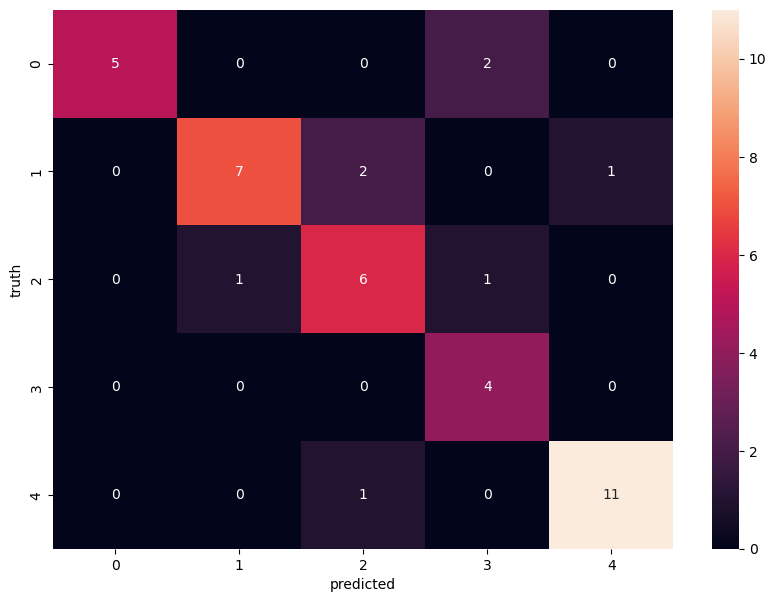

In [178]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

### save trained model


In [179]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

### save class dictionary

In [180]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))